# Exploring MNIST And Deep Neural Networks

Before we can build any neural networks we need to import a few things from Keras and prepare our data. The following code extracts the MNIST dataset, provided by Keras, and flattens the 28x28 pixel images into a vector with length 784. Additionally, it modifies the labels from a numeric value 0-9 to a one-hot encoded vector.

In [69]:
import keras
import pandas as pd
from keras.datasets import mnist
from keras.layers import Dense
from keras.models import Sequential
from matplotlib import pyplot as plt
from random import randint


# Preparing the dataset
# Setup train and test splits
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Making a copy before flattening for the next code-segment which displays images
x_train_drawing = x_train
x_test_drawing = x_test
image_size = 784 # 28 x 28
x_train = x_train.reshape(x_train.shape[0], image_size) 
x_test = x_test.reshape(x_test.shape[0], image_size)

# Convert class vectors to binary class matrices
num_classes = 10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

## Looking at the digits dataset

It's a good idea to get a sense of the dataset we're working with. Runing this code will show randomly selected digits from the training set. 

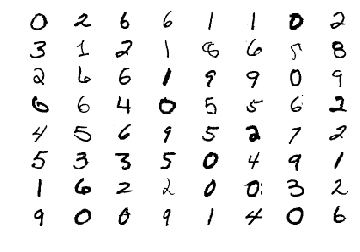

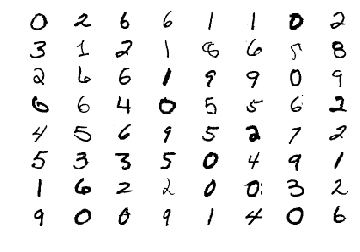

In [2]:
for i in range(64):
    ax = plt.subplot(8, 8, i+1)
    ax.axis('off')
    plt.imshow(x_train_drawing[randint(0, x_train.shape[0])], cmap='Greys')

## Train & Evaluate The Network to test for 

This code trains and evaluates a neural net. It also uses `matplotlib` and the history object provided by Keras, which tracks how the model behaves through it's training.

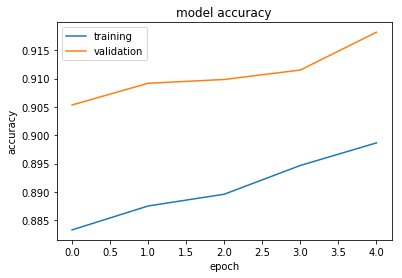

Test loss: 0.381
Test accuracy: 0.902


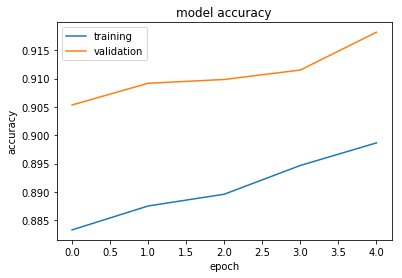

Test loss: 0.381
Test accuracy: 0.902


In [5]:
model.compile(optimizer="sgd", loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x_train, y_train, batch_size=128, epochs=5, verbose=False, validation_split=.1)
loss, accuracy  = model.evaluate(x_test, y_test, verbose=False)

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='best')
plt.show()

print(f'Test loss: {loss:.3}')
print(f'Test accuracy: {accuracy:.3}')

## Helper function

`create_dense` allows to easily add multiple layers to our neural nets.

In [8]:
def create_dense(layer_sizes):
    model = Sequential()
    model.add(Dense(layer_sizes[0], activation='sigmoid', input_shape=(image_size,)))

    for s in layer_sizes[1:]:
        model.add(Dense(units = s, activation = 'sigmoid'))

    model.add(Dense(units=num_classes, activation='softmax'))

    return model


## Testing different number of nodes

The following code trains and evaluates models with different number of nodes. We can see that adding more node improves the efficacy of the NN.



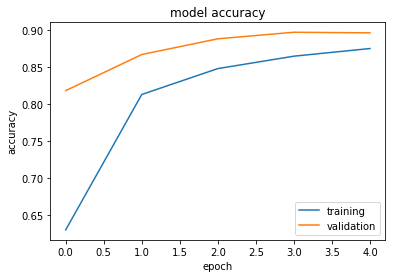

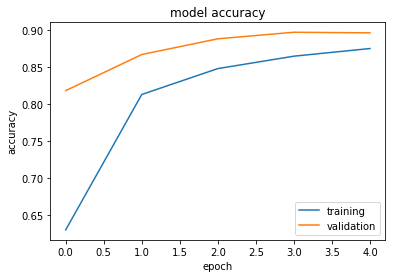

Test loss: 0.509
Test accuracy: 0.883
Test loss: 0.509
Test accuracy: 0.883


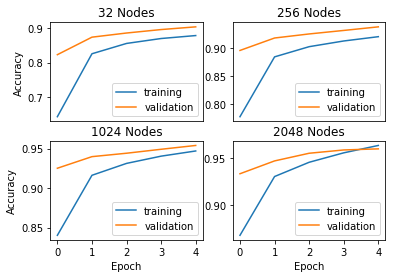

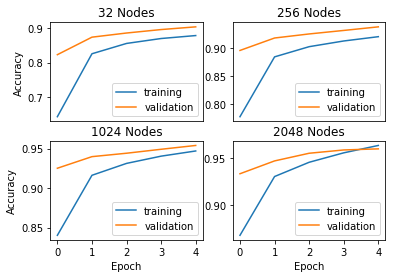

In [26]:
model = create_dense([32] * 1)
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])


history = model.fit(x_train, y_train, batch_size=128, epochs=5, verbose=False, validation_split=.1)
loss, accuracy  = model.evaluate(x_test, y_test, verbose=False)

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='best')
plt.show()

print(f'Test loss: {loss:.3}')
print(f'Test accuracy: {accuracy:.3}')



fig, axs = plt.subplots(2, 2)
model = create_dense([32] )
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x_train, y_train, batch_size=128, epochs=5, verbose=False, validation_split=.1)

axs[0, 0].plot(history.history['accuracy'])
axs[0, 0].plot(history.history['val_accuracy'])
axs[0, 0].set_title('32 Nodes')
axs[0, 0].legend(['training', 'validation'], loc='best')
axs[0, 0].set(ylabel='Accuracy')
axs[0, 0].set_xticks([])

model = create_dense([256] )
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x_train, y_train, batch_size=128, epochs=5, verbose=False, validation_split=.1)

axs[0, 1].plot(history.history['accuracy'])
axs[0, 1].plot(history.history['val_accuracy'])
axs[0, 1].set_title('256 Nodes')
axs[0, 1].legend(['training', 'validation'], loc='best')
axs[0, 1].set_xticks([])




model = create_dense([1024] )
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x_train, y_train, batch_size=128, epochs=5, verbose=False, validation_split=.1)

axs[1, 0].plot(history.history['accuracy'])
axs[1, 0].plot(history.history['val_accuracy'])
axs[1, 0].set_title('1024 Nodes')
axs[1, 0].legend(['training', 'validation'], loc='best')
axs[1, 0].set(xlabel='Epoch', ylabel='Accuracy')


model = create_dense([2048])
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x_train, y_train, batch_size=128, epochs=5, verbose=False, validation_split=.1)


axs[1, 1].plot(history.history['accuracy'])
axs[1, 1].plot(history.history['val_accuracy'])
axs[1, 1].set_title('2048 Nodes')
axs[1, 1].legend(['training', 'validation'], loc='best')
axs[1, 1].set(xlabel='Epoch')

# for ax in axs.flat:
#     ax.set(xlabel='Epoch', ylabel='Accuracy')

# # Hide x labels and tick labels for top plots and y ticks for right plots.
# for ax in axs.flat:
#     ax.label_outer()
    
fig.savefig("Nbnodes.png", dpi = 300)



## Testing different learning rates

The following code trains and evaluates models with different learning rates. We select 0.001 and use it for the rest of the notebook


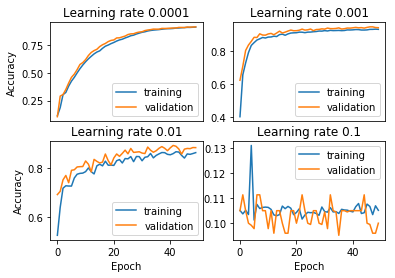

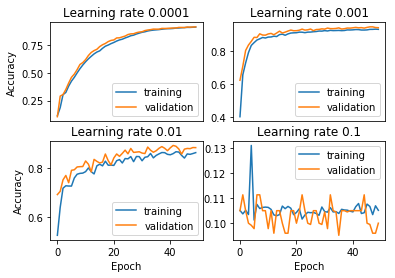

In [36]:

fig, axs = plt.subplots(2, 2)
model = create_dense([32] * 4)
optimizer = keras.optimizers.Adam(lr=0.0001)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x_train, y_train, batch_size=128, epochs = 50, verbose=False, validation_split=.1)

axs[0, 0].plot(history.history['accuracy'])
axs[0, 0].plot(history.history['val_accuracy'])
axs[0, 0].set_title('Learning rate 0.0001')
axs[0, 0].legend(['training', 'validation'], loc='best')
axs[0, 0].set(ylabel='Accuracy')
axs[0, 0].set_xticks([])

model = create_dense([32] * 4)
optimizer = keras.optimizers.Adam(lr=0.001)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x_train, y_train, batch_size=128, epochs = 50, verbose=False, validation_split=.1)

axs[0, 1].plot(history.history['accuracy'])
axs[0, 1].plot(history.history['val_accuracy'])
axs[0, 1].set_title('Learning rate 0.001')
axs[0, 1].legend(['training', 'validation'], loc='best')
axs[0, 1].set_xticks([])




model = create_dense([32] * 4)
optimizer = keras.optimizers.Adam(lr=0.01)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x_train, y_train, batch_size=128, epochs = 50, verbose=False, validation_split=.1)

axs[1, 0].plot(history.history['accuracy'])
axs[1, 0].plot(history.history['val_accuracy'])
axs[1, 0].set_title('Learning rate 0.01')
axs[1, 0].legend(['training', 'validation'], loc='best')
axs[1, 0].set(xlabel='Epoch', ylabel='Accuracy')


model = create_dense([32] * 4)
optimizer = keras.optimizers.Adam(lr=0.1)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x_train, y_train, batch_size=128, epochs = 50, verbose=False, validation_split=.1)


axs[1, 1].plot(history.history['accuracy'])
axs[1, 1].plot(history.history['val_accuracy'])
axs[1, 1].set_title('Learning rate 0.1')
axs[1, 1].legend(['training', 'validation'], loc='best')
axs[1, 1].set(xlabel='Epoch')

# for ax in axs.flat:
#     ax.set(xlabel='Epoch', ylabel='Accuracy')

# # Hide x labels and tick labels for top plots and y ticks for right plots.
# for ax in axs.flat:
#     ax.label_outer()
    
fig.savefig("LearningRates.png", dpi = 300)


## Testing different width and depth together

Model: "sequential_76"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_238 (Dense)            (None, 32)                25120     
_________________________________________________________________
dense_239 (Dense)            (None, 32)                1056      
_________________________________________________________________
dense_240 (Dense)            (None, 32)                1056      
_________________________________________________________________
dense_241 (Dense)            (None, 10)                330       
Total params: 27,562
Trainable params: 27,562
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_76"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_238 (Dense)            (None, 32)                25120     
__________________________

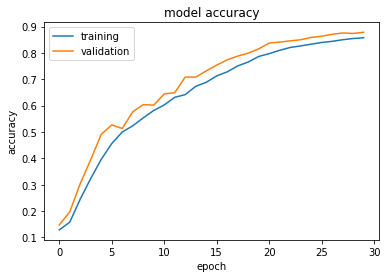

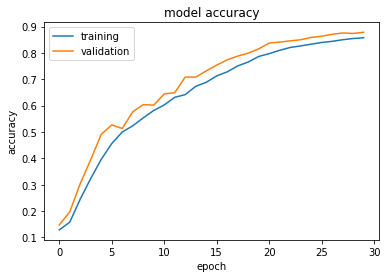


Test loss: 0.6
Test accuracy: 0.855
Model: "sequential_77"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_242 (Dense)            (None, 32)                25120     
_________________________________________________________________
dense_243 (Dense)            (None, 32)                1056      
_________________________________________________________________
dense_244 (Dense)            (None, 32)                1056      
_________________________________________________________________
dense_245 (Dense)            (None, 32)                1056      
_________________________________________________________________
dense_246 (Dense)            (None, 10)                330       
Total params: 28,618
Trainable params: 28,618
Non-trainable params: 0
_________________________________________________________________

Test loss: 0.6
Test accuracy: 0.855
Model: "sequential_77"
__________________

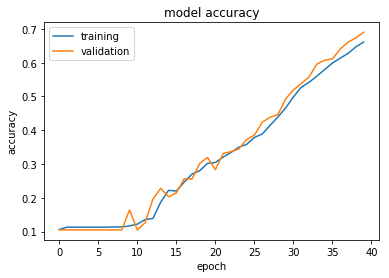

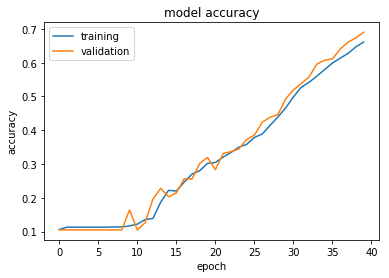


Test loss: 1.08
Test accuracy: 0.671
Model: "sequential_78"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_247 (Dense)            (None, 32)                25120     
_________________________________________________________________
dense_248 (Dense)            (None, 32)                1056      
_________________________________________________________________
dense_249 (Dense)            (None, 32)                1056      
_________________________________________________________________
dense_250 (Dense)            (None, 32)                1056      
_________________________________________________________________
dense_251 (Dense)            (None, 32)                1056      
_________________________________________________________________
dense_252 (Dense)            (None, 10)                330       
Total params: 29,674
Trainable params: 29,674
Non-trainable params: 0
___________

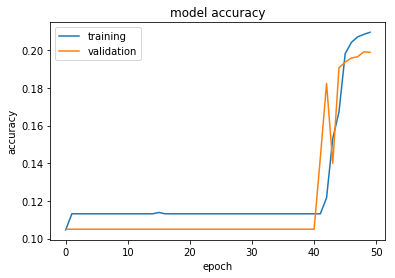

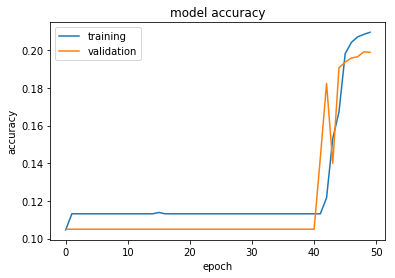


Test loss: 2.21
Test accuracy: 0.208
Model: "sequential_79"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_253 (Dense)            (None, 128)               100480    
_________________________________________________________________
dense_254 (Dense)            (None, 128)               16512     
_________________________________________________________________
dense_255 (Dense)            (None, 128)               16512     
_________________________________________________________________
dense_256 (Dense)            (None, 10)                1290      
Total params: 134,794
Trainable params: 134,794
Non-trainable params: 0
_________________________________________________________________

Test loss: 2.21
Test accuracy: 0.208
Model: "sequential_79"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_253 (Den

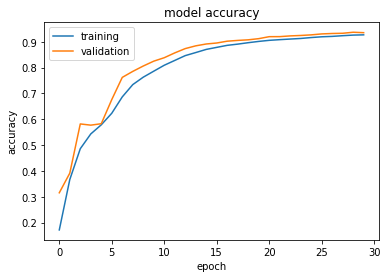

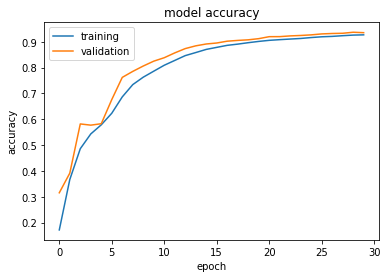


Test loss: 0.288
Test accuracy: 0.922
Model: "sequential_80"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_257 (Dense)            (None, 128)               100480    
_________________________________________________________________
dense_258 (Dense)            (None, 128)               16512     
_________________________________________________________________
dense_259 (Dense)            (None, 128)               16512     
_________________________________________________________________
dense_260 (Dense)            (None, 128)               16512     
_________________________________________________________________
dense_261 (Dense)            (None, 10)                1290      
Total params: 151,306
Trainable params: 151,306
Non-trainable params: 0
_________________________________________________________________

Test loss: 0.288
Test accuracy: 0.922
Model: "sequential_80"
____________

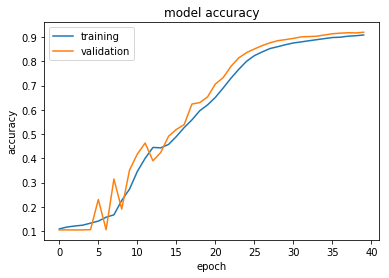

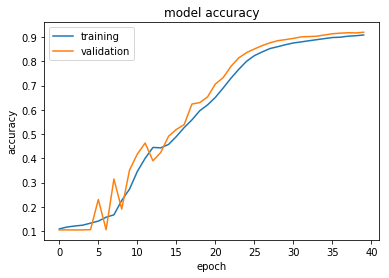


Test loss: 0.389
Test accuracy: 0.905
Model: "sequential_81"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_262 (Dense)            (None, 128)               100480    
_________________________________________________________________
dense_263 (Dense)            (None, 128)               16512     
_________________________________________________________________
dense_264 (Dense)            (None, 128)               16512     
_________________________________________________________________
dense_265 (Dense)            (None, 128)               16512     
_________________________________________________________________
dense_266 (Dense)            (None, 128)               16512     
_________________________________________________________________
dense_267 (Dense)            (None, 10)                1290      
Total params: 167,818
Trainable params: 167,818
Non-trainable params: 0
________

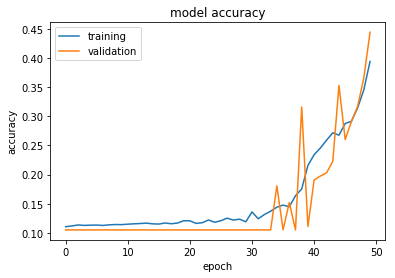

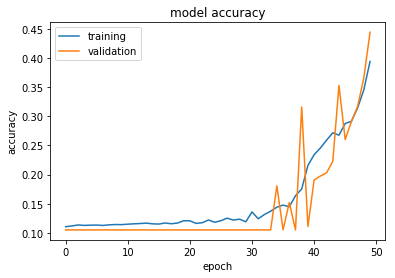


Test loss: 1.71
Test accuracy: 0.424
Model: "sequential_82"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_268 (Dense)            (None, 512)               401920    
_________________________________________________________________
dense_269 (Dense)            (None, 512)               262656    
_________________________________________________________________
dense_270 (Dense)            (None, 512)               262656    
_________________________________________________________________
dense_271 (Dense)            (None, 10)                5130      
Total params: 932,362
Trainable params: 932,362
Non-trainable params: 0
_________________________________________________________________

Test loss: 1.71
Test accuracy: 0.424
Model: "sequential_82"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_268 (Den

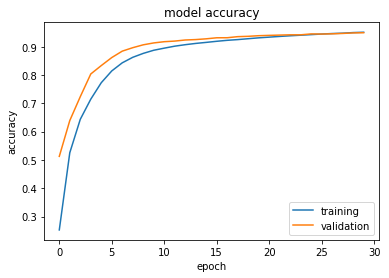

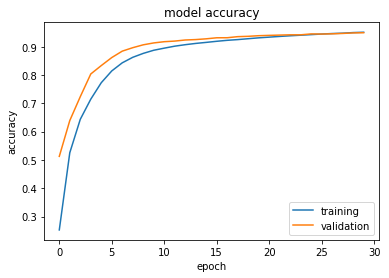


Test loss: 0.217
Test accuracy: 0.937
Model: "sequential_83"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_272 (Dense)            (None, 512)               401920    
_________________________________________________________________
dense_273 (Dense)            (None, 512)               262656    
_________________________________________________________________
dense_274 (Dense)            (None, 512)               262656    
_________________________________________________________________
dense_275 (Dense)            (None, 512)               262656    
_________________________________________________________________
dense_276 (Dense)            (None, 10)                5130      
Total params: 1,195,018
Trainable params: 1,195,018
Non-trainable params: 0
_________________________________________________________________

Test loss: 0.217
Test accuracy: 0.937
Model: "sequential_83"
________

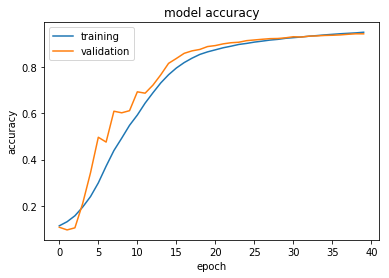

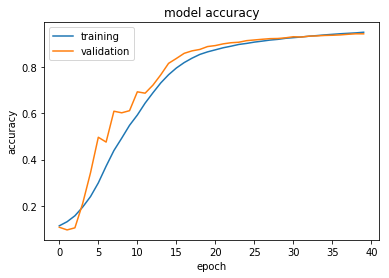


Test loss: 0.247
Test accuracy: 0.933
Model: "sequential_84"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_277 (Dense)            (None, 512)               401920    
_________________________________________________________________
dense_278 (Dense)            (None, 512)               262656    
_________________________________________________________________
dense_279 (Dense)            (None, 512)               262656    
_________________________________________________________________
dense_280 (Dense)            (None, 512)               262656    
_________________________________________________________________
dense_281 (Dense)            (None, 512)               262656    
_________________________________________________________________
dense_282 (Dense)            (None, 10)                5130      
Total params: 1,457,674
Trainable params: 1,457,674
Non-trainable params: 0
____

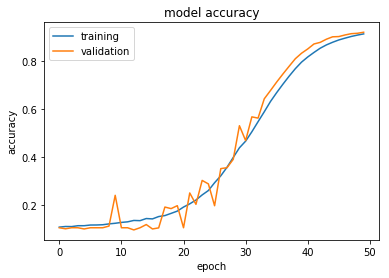

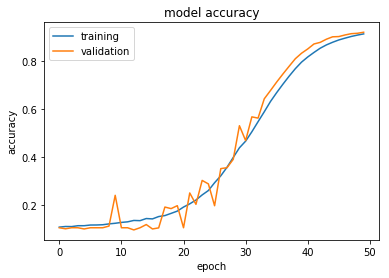


Test loss: 0.39
Test accuracy: 0.904

Test loss: 0.39
Test accuracy: 0.904


In [33]:

for nodes_per_layer in [32, 128, 512]:
    for layers in [3, 4, 5]:
        model = create_dense([nodes_per_layer] * layers)
        evaluate(model, epochs=10*layers)

## Testing different optimisers

The following code trains and evaluates models with different optimisers



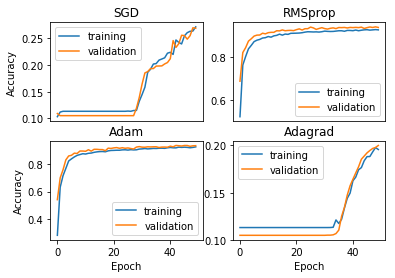

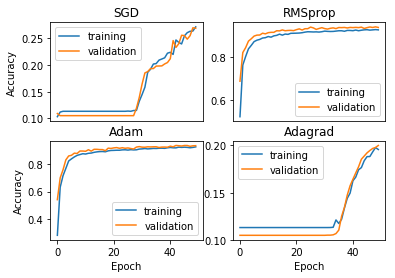

In [75]:

fig, axs = plt.subplots(2, 2)
model = create_dense([32] * 4)
optimizer = keras.optimizers.SGD(lr=0.001, momentum=0.8)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x_train, y_train, batch_size=128, epochs = 50, verbose=False, validation_split=.1)

axs[0, 0].plot(history.history['accuracy'])
axs[0, 0].plot(history.history['val_accuracy'])
axs[0, 0].set_title('SGD')
axs[0, 0].legend(['training', 'validation'], loc='best')
axs[0, 0].set(ylabel='Accuracy')
axs[0, 0].set_xticks([])

model = create_dense([32] * 4)
optimizer = keras.optimizers.RMSprop(
    learning_rate=0.001,
    rho=0.9,
    momentum=0.8,
    epsilon=1e-07,
)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x_train, y_train, batch_size=128, epochs = 50, verbose=False, validation_split=.1)

axs[0, 1].plot(history.history['accuracy'])
axs[0, 1].plot(history.history['val_accuracy'])
axs[0, 1].set_title('RMSprop')
axs[0, 1].legend(['training', 'validation'], loc='best')
axs[0, 1].set_xticks([])




model = create_dense([32] * 4)
optimizer = keras.optimizers.Adam(lr=0.001)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x_train, y_train, batch_size=128, epochs = 50, verbose=False, validation_split=.1)

axs[1, 0].plot(history.history['accuracy'])
axs[1, 0].plot(history.history['val_accuracy'])
axs[1, 0].set_title('Adam')
axs[1, 0].legend(['training', 'validation'], loc='best')
axs[1, 0].set(xlabel='Epoch', ylabel='Accuracy')


model = create_dense([32] * 4)
optimizer = keras.optimizers.Adagrad(lr=0.001)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x_train, y_train, batch_size=128, epochs = 50, verbose=False, validation_split=.1)


axs[1, 1].plot(history.history['accuracy'])
axs[1, 1].plot(history.history['val_accuracy'])
axs[1, 1].set_title('Adagrad')
axs[1, 1].legend(['training', 'validation'], loc='best')
axs[1, 1].set(xlabel='Epoch')

# for ax in axs.flat:
#     ax.set(xlabel='Epoch', ylabel='Accuracy')

# # Hide x labels and tick labels for top plots and y ticks for right plots.
# for ax in axs.flat:
#     ax.label_outer()
    
fig.savefig("Optimizers.png", dpi = 300)



## Confusion matrix

In [51]:
model = create_dense([32] * 5)
optimizer = keras.optimizers.Adam(lr=0.001)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x_train, y_train, batch_size=128, epochs = 60, verbose=False, validation_split=.1)


test_predictions = model.predict(x_test)


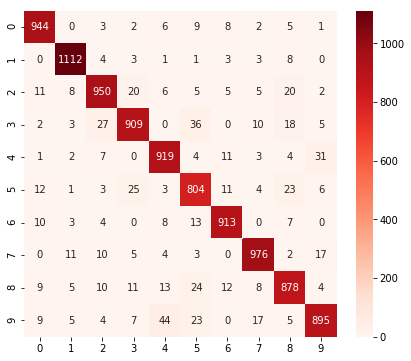

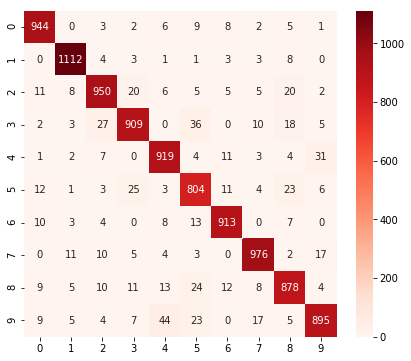

In [56]:
test_predictions = model.predict(x_test)

from sklearn.metrics import confusion_matrix
import numpy as np

confusion = confusion_matrix(np.argmax(y_test,axis=1), np.argmax(test_predictions,axis=1))
confusion
import seaborn as sns
plt.figure(figsize=[7,6])
sns.heatmap(confusion, cmap="Reds", annot=True, fmt='.0f')
plt.savefig("confusion matrix.png", dpi = 200)
plt.show()


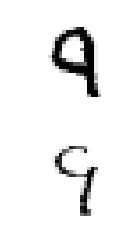

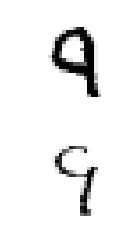

In [79]:
images = np.where((np.argmax(y_test,axis=1)==9) & (np.argmax(test_predictions,axis=1)==4))
ax = plt.subplot(2, 1, 1)
ax.axis('off')  
    
plt.imshow(x_test_drawing[images[0][1]],cmap='Greys' )
ax = plt.subplot(2, 1, 2)
ax.axis('off')  
    
plt.imshow(x_test_drawing[images[0][5]],cmap='Greys' )
plt.savefig("misclassified.png", dpi = 200)